# Import modules

In [58]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix  ,  ConfusionMatrixDisplay
sns.set_style('whitegrid')

In [59]:
def data_details(d):
    print('____________________________________________________')
    missig_val = sum(d.isna().sum())
    all_val = sum((d.count()))
    sparsity = missig_val / all_val
    print( 'Sparisty : {:.2f}'.format(sparsity))
    cl = np.unique(d['class'])
    print('Classes : ' , cl)
    num_src = []
    num_obs = []
    for c in cl:
        s = len(np.unique(d[d['class']==c]['src_id']))
        o = len(d[d['class']==c])
        num_src.append(s)
        num_obs.append(o)
    deets = pd.DataFrame(
        {
            "Class" : cl , 
            "# Source" : num_src , 
            "# Obs" : num_obs
        }
    )
    display(deets) 
    print('Total Number os sources : ' , sum(num_src))
    print('Total number of obs :' , sum(num_obs))
    print('____________________________________________________')
    
#data_details(df)

# Load data

## Before imputation

In [135]:
df = pd.read_csv('../processed_data/BH_.csv', index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('../processed_data/NS_.csv' , index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('../processed_data/CV_.csv' , index_col='obs_id')

df_cv = df.copy()

df = pd.read_csv('../processed_data/PULSAR_.csv' , index_col='obs_id')

df_pl = df.copy()

df_no_imp = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)
data_details(df_no_imp)

____________________________________________________
Sparisty : 0.58
Classes :  ['BH' 'CV' 'NS' 'PULSAR']


,Class,# Source,# Obs
0,BH,29,199
1,CV,70,786
2,NS,52,440
3,PULSAR,126,445


Total Number os sources :  277
Total number of obs : 1870
____________________________________________________


### After Imputation

In [136]:
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' ,  index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv',  index_col='obs_id')
df_cv = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv',  index_col='obs_id')
df_pl = df.copy()

df = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)
#display(df)

df = df.replace('NS' , 'XRB')
df = df.replace('BH' , 'XRB')
class_to_select = ['CV' , 'PULSAR']
# df = df.replace({
#     'XRB' : 1 , 
#     "CV" : 2 ,
#     "PULSAR" :3
# })
# class_to_select = [1,2,3]
df = df[df['class'].isin(class_to_select)]
data_details(df)

____________________________________________________
Sparisty : 0.06
Classes :  ['CV' 'PULSAR']


,Class,# Source,# Obs
0,CV,65,515
1,PULSAR,118,319


Total Number os sources :  183
Total number of obs : 834
____________________________________________________


Let us see , how many values are still missing in each column

In [137]:
info_col = ['class' , 'significance' , 'src_n' , 'src_id']
x = df.drop(columns=info_col)
y = df['class']
i = df[info_col]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , stratify=y)
display(x_train , y_train , x_test , y_test)

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_451,-5.460548,-6.222646,-6.242528,-5.514705,-6.136975,-6.079824,-6.013183,-6.184555,-6.329383,-5.576590,...,0.000428,-0.0256,-0.1955,-0.1711,-0.0219,-0.3142,0.1449,0.3029,0.1318,-0.0287
PULSAR_OBS_1,-4.807990,-5.806597,-6.419075,-4.914709,-5.595851,-5.147276,-5.549905,-5.336299,-6.232696,-5.066614,...,0.001102,-0.3467,-0.8351,-0.6533,-0.4354,-0.8264,0.0862,0.4691,-0.3804,-0.6296
CV_OBS_431,-4.785686,-5.457050,-5.598772,-4.827397,-5.395342,-5.479647,-5.428757,-5.576590,-5.529149,-4.876148,...,0.001886,-0.1705,-0.1618,0.0200,0.1418,-0.0993,-0.0500,0.0681,0.1031,-0.0300
PULSAR_OBS_39,-5.532392,-6.265280,-6.804654,-5.642446,-6.100453,-5.996971,-6.176265,-6.309893,-6.534171,-5.800519,...,0.000321,-0.4341,-0.7214,-0.3723,-0.0618,-0.6190,-0.0949,0.2392,-0.1405,-0.4635
PULSAR_OBS_409,-5.153354,-5.854804,NaN,-5.251657,-5.707080,-5.557834,-6.156145,-5.746904,-6.097779,-5.388277,...,0.001162,-1.0000,-1.0000,-0.3498,-0.1081,-0.5640,-0.9994,-0.3317,-0.5965,-0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_512,-4.965372,-5.786217,-5.713095,-4.997402,-5.727462,-5.458296,-5.579879,-5.510182,-5.853872,-5.032312,...,0.001434,0.0681,-0.2929,-0.3623,-0.2829,-0.4366,0.1699,0.2667,-0.1181,-0.2061
CV_OBS_655,-5.690370,NaN,NaN,-5.967784,-6.308211,-6.119186,-6.114187,-7.374482,NaN,-7.246723,...,NaN,-0.1518,-1.0000,-0.9994,-0.2829,-1.0000,0.9994,1.0000,-0.0668,-0.9994
CV_OBS_453,-3.827689,-4.725150,-4.453087,-3.841939,-4.697453,-4.331987,-4.404614,-4.355266,-4.754734,-3.856361,...,0.015018,0.2917,-0.1468,-0.4247,-0.3904,-0.4578,0.3298,0.3666,-0.0731,-0.1099


obs_id
CV_OBS_451            CV
PULSAR_OBS_1      PULSAR
CV_OBS_431            CV
PULSAR_OBS_39     PULSAR
PULSAR_OBS_409    PULSAR
                   ...  
CV_OBS_512            CV
CV_OBS_655            CV
CV_OBS_453            CV
PULSAR_OBS_51     PULSAR
CV_OBS_521            CV
Name: class, Length: 667, dtype: object

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_3,-3.508218,-4.183361,-4.600499,-3.529590,-4.152612,-4.016103,-4.471855,-4.049830,-4.216454,-3.552222,...,0.026587,-0.447800,-0.589000,-0.191100,-0.140500,-0.240500,-0.377300,-0.307900,-0.471600,-0.530900
PULSAR_OBS_23,-3.440572,-4.083178,-3.924818,-3.443939,-4.077638,-4.202871,-3.913284,-4.209996,-4.088842,-3.447453,...,0.051790,0.179300,0.306700,0.137400,0.146800,0.128000,0.187400,0.195500,0.324200,0.316100
CV_OBS_458,-3.638839,-4.561299,-4.223735,-3.645507,-4.546223,-4.104136,-4.197568,-4.114526,-4.577903,-3.652475,...,0.033775,0.365400,-0.140500,-0.483400,-0.469100,-0.500300,0.384800,0.404100,-0.104300,-0.122400
CV_OBS_480,-5.705975,-6.319030,-6.729554,-5.830914,-6.168386,-6.397506,-6.655019,-6.788612,-6.551603,-6.007049,...,0.000242,-0.861300,-0.870100,0.041200,0.372900,-0.270500,-0.603400,-0.276700,-0.205500,-0.589600
PULSAR_OBS_250,-4.689307,-6.546855,-4.996230,-4.801068,-6.296021,-6.216404,-4.857948,-7.028080,-7.267391,-4.951558,...,0.005434,0.916551,0.822882,-0.837075,-0.272574,-0.884968,0.954152,0.986359,0.979001,0.924094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_30,-4.928118,-5.635449,-5.542572,-4.984640,-5.551758,-5.718058,-5.364315,-5.898253,-5.746178,-5.049586,...,0.001297,0.080600,0.120500,0.073700,0.271700,-0.113100,0.219900,0.352900,0.467800,0.293600
CV_OBS_642,-5.074636,-5.747390,-5.744727,-5.197568,-5.579055,-6.319795,-5.331241,-6.696504,-6.048468,-5.369776,...,0.001307,0.024400,0.763900,0.999400,1.000000,0.606500,0.326000,0.585300,1.000000,0.999400
PULSAR_OBS_436,-5.707522,-6.394049,-6.689094,-5.822752,-6.221921,-6.433327,-6.149293,-6.859178,-6.707080,-5.990974,...,0.000279,-0.240500,-0.260500,0.000000,0.365400,-0.344200,0.106200,0.421600,0.466600,0.109900


obs_id
PULSAR_OBS_3      PULSAR
PULSAR_OBS_23     PULSAR
CV_OBS_458            CV
CV_OBS_480            CV
PULSAR_OBS_250    PULSAR
                   ...  
PULSAR_OBS_30     PULSAR
CV_OBS_642            CV
PULSAR_OBS_436    PULSAR
PULSAR_OBS_40     PULSAR
CV_OBS_536            CV
Name: class, Length: 167, dtype: object

In [138]:
clf = xgb.XGBClassifier(random_state=42)
x_train_z = x_train.replace(np.nan , 0)
x_test_z = x_test.replace(np.nan , 0)
clf = RandomForestClassifier()
clf.fit(
    x_train_z , y_train
)
train_score = clf.score(x_train_z , y_train)
test_score = clf.score(x_test_z , y_test)
print(train_score , test_score)

1.0 0.9161676646706587


# Source-wise data split

We will split the data based on source, however we want to select the sources having least number of observations for testing ,
so first we sort soure list by number of observations , then from the top 50 % , we pick 40 percent from each class , hence source-wise we have finally 20 percent sources

In [60]:
train_acc = []
test_acc = []
verbose = 0
for i in range(10):
    df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id')
    df_bh = df.copy()

    df = pd.read_csv('imp_data/NS_src_imp.csv' ,  index_col='obs_id')
    df_ns = df.copy()

    df = pd.read_csv('imp_data/CV_src_imp.csv',  index_col='obs_id')
    df_cv = df.copy()

    df = pd.read_csv('imp_data/PULSAR_src_imp.csv',  index_col='obs_id')
    df_pl = df.copy()
    df = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)

    df
    df = df.replace({"NS" : "XRB" , 'BH' : "XRB"})



    src_list = pd.DataFrame()
    class_to_select = ['XRB' ,  'CV' , 'PULSAR']
    for cl in class_to_select:
        src = df[df['class']==cl]['src_id'].value_counts().sort_values()
        src = src.iloc[:int(len(src)/2)]
        src_select = src.sample(frac=0.6)
        src_id = src_select.index.to_list()
        src_obs = src_select.to_list()
        temp_src = pd.DataFrame({ 
            'src_id' : src_id , 
            'obs_count' : src_obs
        })
        src_list = src_list.append(temp_src)
    #src_list

    all_src = np.unique(df['src_id'].to_list())
    test_src = src_list['src_id'].to_list()
    train_src= list(set(all_src) - set(src_list['src_id']))
    if(verbose):
        print('Total Number of ssources :' , len(all_src))
        print('Training_sources : ' , len(train_src) )
        print('Validation sources :' , len(test_src))

    # df = df.replace({
    #     "BH" :2 , 
    #     "NS" : 2 ,
    #     "CV" : 0 , 
    #     "PULSAR" : 1 
    # })


    df= df[df['class'].isin(class_to_select)]
    df 


    info_col = ['class' , 'significance' , 'src_n' , 'src_id']
    df_train  = df[df['src_id'].isin(train_src)]
    df_test = df[df['src_id'].isin(test_src)]

    df_train = df_train[df_train['class'].isin(class_to_select)]
    df_test = df_test[df_test['class'].isin(class_to_select)]
    if(verbose):
        data_details(df_test)
        data_details(df_train)


    #df_train = df_train.replace({"BH" : 0 ,"NS" : 0 , "CV" : 1 ,"PULSAR" :2})
    #df_test = df_test.replace({"BH" : 0 ,"NS" : 0 , "CV" : 1 ,"PULSAR" :2})

    #data_details(df)
    if(verbose):
        print('Training data details : ')
        data_details(df_train)
        print('Test data details : ')
        data_details(df_test)



    x_train = df_train.drop(columns=info_col)
    y_train = df_train['class'].to_list()
    i_train = df_train[info_col]



    x_test = df_test.drop(columns=info_col)
    y_test = df_test['class'].to_list()
    i_test = df_test[info_col]

    clf = xgb.XGBClassifier(seed = 42 , )
    clf.fit(
        x_train , y_train , 
        verbose = False , 
        #early_stopping_rounds = 20 , 
        #eval_metric = 'merror' , 
        #eval_set = [(x_test , y_test)]
    )
    train_score = clf.score(x_train , y_train)
    test_score = clf.score(x_test , y_test)
    print(train_score , test_score)
    train_acc.append(train_score)
    test_acc.append(test_score)


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.99581589958159 0.5353535353535354
[20:25:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9932998324958124 0.58
[20:25:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9932829554995802 0.6213592233009708
[20:26:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9957947855340622 0.6
[20:26:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9932546374367622 0.6203703703703703
[20:26:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.995787700084246 0.5794392523364486
[20:26:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9957841483979764 0.5277777777777778
[20:26:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9932942162615256 0.6039603960396039
[20:26:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9932432432432432 0.5545454545454546
[20:26:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9958053691275168 0.5980392156862745


In [61]:
score = pd.DataFrame({
    'Train accuracy' : train_acc , 
    'Test Accuracy' : test_acc 
})
score.describe()

,Train accuracy,Test Accuracy
count,10.000000,10.000000
mean,0.994536,0.582085
std,0.001330,0.033275
min,0.993243,0.527778
25%,0.993286,0.560769
50%,0.994542,0.589020
75%,0.995793,0.602970
max,0.995816,0.621359


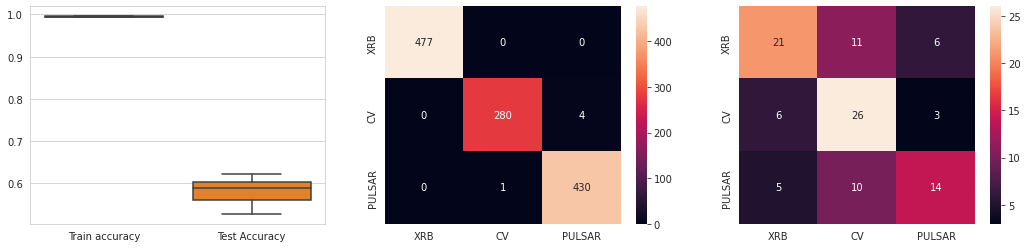

In [62]:
fig , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (18,4))
sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1] , xticklabels =class_to_select , yticklabels = class_to_select)
cf = confusion_matrix(y_test , clf.predict(x_test) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[2] , xticklabels=class_to_select, yticklabels = class_to_select)
#cf = confusion_matrix(y_val , clf.predict(x_val))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[3])
plt.savefig('all-src-split-obs-classification.jpg')
plt.show()

# Source combine

In [63]:
info_col = ['class' ,'src_id' , 'src_n' , 'significance']

In [64]:

train_acc = []
test_acc = []
#for i in range(10):
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' ,  index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv',  index_col='obs_id')
df_cv = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv',  index_col='obs_id')
df_pl = df.copy()
df = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)

df = df.replace({"NS" : "XRB" , 'BH' : "XRB"})
df 
verbose = 0
for i in range(10):

    s_ids = df['src_id'].unique()
    df_comb = pd.DataFrame()
    for s in s_ids[:]:
        temp = df[df['src_id']==s]
        temp_val = temp.drop(columns=info_col)
        #display(temp_val)
        temp_id = temp[info_col].iloc[:1].reset_index()
        temp_mean =  temp_val.mean().to_frame().T.reset_index(drop=True)
        #display(temp_id , temp_mean)
        temp = pd.concat([temp_id , temp_mean] , axis = 1)
        temp = temp.set_index('obs_id')
        df_comb = df_comb.append(temp)
        #display(temp)
    #display(df_comb)
    df = df_comb.copy()

    src_list = pd.DataFrame()
    class_to_select = [ 'XRB', 'CV' , 'PULSAR']
    for cl in class_to_select:
        src = df[df['class']==cl]['src_id'].value_counts().sort_values()
        src = src.iloc[:int(len(src)/2)]
        src_select = src.sample(frac=0.4)
        src_id = src_select.index.to_list()
        src_obs = src_select.to_list()
        temp_src = pd.DataFrame({ 
            'src_id' : src_id , 
            'obs_count' : src_obs
        })
        src_list = src_list.append(temp_src)
    #src_list

    all_src = np.unique(df['src_id'].to_list())
    test_src = src_list['src_id'].to_list()
    train_src= list(set(all_src) - set(src_list['src_id']))
    if(verbose):
        print('Total Number of ssources :' , len(all_src))
        print('Training_sources : ' , len(train_src) )
        print('Validation sources :' , len(test_src))

    df= df[df['class'].isin(class_to_select)]

    info_col = ['class' , 'significance' , 'src_n' , 'src_id']
    df_train  = df[df['src_id'].isin(train_src)]
    df_test = df[df['src_id'].isin(test_src)]

    df_train = df_train[df_train['class'].isin(class_to_select)]
    df_test = df_test[df_test['class'].isin(class_to_select)]
    
    if(verbose):
        print('Training data details : ')
        data_details(df_train)
        print('Test data details : ')
        data_details(df_test)



    x_train = df_train.drop(columns=info_col)
    y_train = df_train['class'].to_list()
    i_train = df_train[info_col]



    x_test = df_test.drop(columns=info_col)
    y_test = df_test['class'].to_list()
    i_test = df_test[info_col]

    clf = xgb.XGBClassifier(
        
    )
    clf.fit(
        x_train , y_train , 
        verbose = False , 
        #early_stopping_rounds = 20 , 
        #eval_metric = 'merror' , 
        #eval_set = [(x_test , y_test)]
    )
    train_score = clf.score(x_train , y_train)
    test_score = clf.score(x_test , y_test)
    print(train_score , test_score)
    train_acc.append(train_score)
    test_acc.append(test_score)


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9951456310679612 0.5576923076923077


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9854368932038835 0.6730769230769231


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.6538461538461539


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.7115384615384616


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9854368932038835 0.7307692307692307


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9951456310679612 0.6538461538461539


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.6923076923076923


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.6538461538461539


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.6923076923076923


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.7115384615384616


In [65]:
score = pd.DataFrame({
    'Train accuracy' : train_acc , 
    'Test Accuracy' : test_acc 
})
score.describe()

,Train accuracy,Test Accuracy
count,10.000000,10.000000
mean,0.990291,0.673077
std,0.003236,0.048819
min,0.985437,0.557692
25%,0.990291,0.653846
50%,0.990291,0.682692
75%,0.990291,0.706731
max,0.995146,0.730769


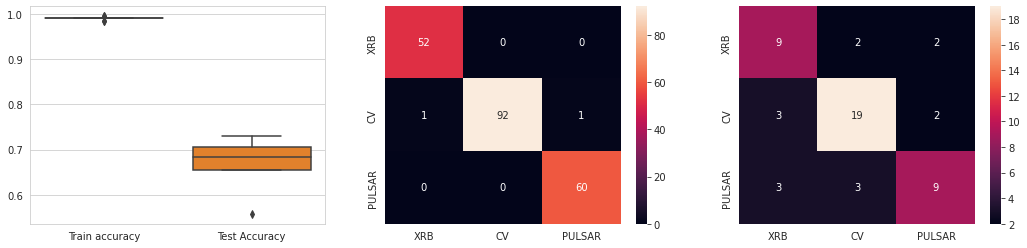

In [66]:
fig , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (18,4))
sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1] , xticklabels =class_to_select , yticklabels = class_to_select)
cf = confusion_matrix(y_test , clf.predict(x_test) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[2] , xticklabels=class_to_select, yticklabels = class_to_select)
#cf = confusion_matrix(y_val , clf.predict(x_val))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[3])
plt.savefig('all-src-split-src-classification-CV-xrb-pulsar.jpg')
plt.show()

# On obs-comb imputed data

In [67]:
df = pd.read_csv('../processed_data/v5_obs_combined/all_once_rf_impute_no_norm.csv' , index_col='obs_id')
df = df.replace({"NS" : "XRB" , 'BH' : "XRB"})
df 
test_acc = []
train_acc = [] 
verbose = 0
for i in range(10):
    src_list = pd.DataFrame()
    class_to_select = ['XRB', 'CV' , 'PULSAR']
    for cl in class_to_select:
        src = df[df['class']==cl]['src_id'].value_counts().sort_values()
        src = src.iloc[:int(len(src)/2)]
        src_select = src.sample(frac=0.4)
        src_id = src_select.index.to_list()
        src_obs = src_select.to_list()
        temp_src = pd.DataFrame({ 
            'src_id' : src_id , 
            'obs_count' : src_obs
        })
        src_list = src_list.append(temp_src)
    #src_list

    all_src = np.unique(df['src_id'].to_list())
    test_src = src_list['src_id'].to_list()
    train_src= list(set(all_src) - set(src_list['src_id']))
    if(verbose):
        print('Total Number of ssources :' , len(all_src))
        print('Training_sources : ' , len(train_src) )
        print('Validation sources :' , len(test_src))

    df= df[df['class'].isin(class_to_select)]

    info_col = ['class' , 'significance' , 'src_n' , 'src_id']
    df_train  = df[df['src_id'].isin(train_src)]
    df_test = df[df['src_id'].isin(test_src)]

    df_train = df_train[df_train['class'].isin(class_to_select)]
    df_test = df_test[df_test['class'].isin(class_to_select)]
    
    if(verbose):
        print('Training data details : ')
        data_details(df_train)
        print('Test data details : ')
        data_details(df_test)



    x_train = df_train.drop(columns=info_col)
    y_train = df_train['class'].to_list()
    i_train = df_train[info_col]



    x_test = df_test.drop(columns=info_col)
    y_test = df_test['class'].to_list()
    i_test = df_test[info_col]

    clf = xgb.XGBClassifier(
        
    )
    clf.fit(
        x_train , y_train , 
        verbose = False , 
        #early_stopping_rounds = 20 , 
        #eval_metric = 'merror' , 
        #eval_set = [(x_test , y_test)]
    )
    train_score = clf.score(x_train , y_train)
    test_score = clf.score(x_test , y_test)
    print(train_score , test_score)
    train_acc.append(train_score)
    test_acc.append(test_score)


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9902912621359223 0.7692307692307693
[20:27:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9902912621359223 0.6538461538461539
[20:27:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9951456310679612 0.5961538461538461
[20:27:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9951456310679612 0.7115384615384616
[20:27:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9902912621359223 0.7884615384615384
[20:27:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9951456310679612 0.5961538461538461
[20:27:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9854368932038835 0.6346153846153846
[20:27:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9854368932038835 0.6346153846153846
[20:27:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9902912621359223 0.7115384615384616
[20:27:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9902912621359223 0.7115384615384616


In [68]:
len(train_acc )
len(test_acc)

10

In [69]:
score = pd.DataFrame({
    'Train accuracy' : train_acc , 
    'Test Accuracy' : test_acc 
})
score.describe()

,Train accuracy,Test Accuracy
count,10.000000,10.000000
mean,0.990777,0.680769
std,0.003582,0.067961
min,0.985437,0.596154
25%,0.990291,0.634615
50%,0.990291,0.682692
75%,0.993932,0.711538
max,0.995146,0.788462


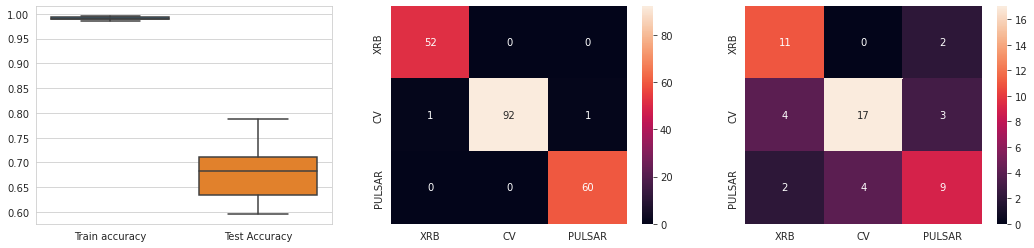

In [70]:
fig , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (18,4))
sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1] , xticklabels =class_to_select , yticklabels = class_to_select)
cf = confusion_matrix(y_test , clf.predict(x_test) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[2] , xticklabels=class_to_select, yticklabels = class_to_select)
#cf = confusion_matrix(y_val , clf.predict(x_val))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[3])
plt.savefig('all-imp-src-split-src-classification-CV-xrb-pulsar.jpg')
plt.show()